In [52]:
# Import statements
import numpy as numpy
import pandas as pd
import seaborn as sns #for plotting
import matplotlib.pyplot as plt
import random

In [53]:
# Define datasets for individual inhibitory checkpoints
data = pd.read_csv('data/ab_ag.tsv', sep='\t')
pd1 = data[data['compound'].str.contains('PD-1', na=False)]
pdl1 = data[data['compound'].str.contains('PD-L1', na=False)]
ctla4 = data[data['compound'].str.contains('CTLA-4', na=False)]
kir = data[data['compound'].str.contains('KIR', na=False)]
lag3 = data[data['compound'].str.contains('LAG', na=False)]
tim3 = data[data['compound'].str.contains('TIM3', na=False)]

In [54]:
# Filter out necessary columns
pd1 = pd1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
pdl1 = pdl1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
ctla4 = ctla4[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
kir = kir[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
lag3 = lag3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
tim3 = tim3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]

In [55]:
combined_dataset = [pdl1, pd1, ctla4, kir, lag3, tim3]

# Shuffle the list randomly
random.shuffle(combined_dataset)

# Concatenate them in the new random order
merged_df = pd.concat(combined_dataset, ignore_index=True)
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

In [56]:
shuffled_df = shuffled_df[shuffled_df['resolution'] < 3.5]
shuffled_df = shuffled_df.dropna()

In [57]:
l = ['CTLA-4', 'TIM3', 'PD-1', 'PD-L1', 'KIR', 'LAG3']

new_df = pd.DataFrame(index = l)

for item in l:
    count = shuffled_df[shuffled_df['compound'].str.contains(item, na=False)].shape[0]
    new_df.loc[item, 'count'] = count

new_df = new_df.reset_index()
new_df.columns = ['checkpoint', 'count'] 

In [58]:
# 1. Filter all relevant rows: those with 'mab' OR 'M6903'
ab_mask = shuffled_df['compound'].str.contains('mab|M6903', na=False, case=False)
shuffled_df_ab = shuffled_df[ab_mask]

# 2. Extract antibody names
shuffled_df_ab['antibody'] = shuffled_df_ab['compound'].str.extract(r'\b(\w*mab)\b', expand=False)

# 3. Fill in M6903 manually where missing
m6903_mask = shuffled_df_ab['compound'].str.contains('M6903', na=False)
shuffled_df_ab.loc[m6903_mask, 'antibody'] = shuffled_df_ab.loc[m6903_mask, 'antibody'].fillna('M6903')

# # 4. Extract checkpoint names
checkpoints_pattern = r'\b(PD-1|PD-L1|CTLA-4|KIR2DL3|TIM3)\b'
shuffled_df_ab['checkpoint'] = shuffled_df_ab['compound'].str.extract(checkpoints_pattern, expand=False)

# # 5. Final formatting
shuffled_df_ab = shuffled_df_ab[['antibody', 'checkpoint', 'pdb', 'Hchain', 'Lchain', 'antigen_chain']]
shuffled_df_ab['antibody'] = shuffled_df_ab['antibody'].str.upper()

shuffled_df_ab


/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/ipykernel_74462/2002865464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df_ab['antibody'] = shuffled_df_ab['compound'].str.extract(r'\b(\w*mab)\b', expand=False)
/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/ipykernel_74462/2002865464.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df_ab['checkpoint'] = shuffled_df_ab['compound'].str.extract(checkpoints_pattern, expand=False)


,antibody,checkpoint,pdb,Hchain,Lchain,antigen_chain
1,PEMBROLIZUMAB,PD-1,5b8c,B,A,C
2,PEMBROLIZUMAB,PD-1,5jxe,D,C,B
3,IPILIMUMAB,CTLA-4,6rp8,H,L,C
4,CEMIPLIMAB,PD-1,7wvm,C,D,F
5,M6903,TIM3,6txz,H,L,A
6,PEMBROLIZUMAB,PD-1,5b8c,K,J,L
7,IPILIMUMAB,CTLA-4,7su1,H,L,C
10,TISLELIZUMAB,PD-1,7cgw,H,L,P
11,TREMELIMUMAB,CTLA-4,5ggv,H,L,Y
15,M6903,TIM3,6txz,K,O,D


In [59]:
pdb_list = shuffled_df_ab['pdb'].unique().tolist()
#shuffled_df_ab['antibody'] = shuffled_df_ab['antibody'].str.upper()

with open('pdb_list.txt', 'w') as f:
    for pdb in pdb_list:
        f.write(pdb + '\n')

# Epitope Mapping and Interface Area Try-Out

In [60]:
# nicht generalisierter Code 
from pymol import cmd

# Input 
pdb_file = "7cu5.pdb"           # Replace with your file path
antibody_chains = "Q"         # Replace with your antibody chains
antigen_chain = "A"             # Replace with your antigen chain
cutoff_distance = 5.0           # Distance cutoff in Å

# Load structure 
cmd.reinitialize()
cmd.load(pdb_file)

# Define selections
cmd.select("antibody", f"chain {antibody_chains}")
cmd.select("antigen", f"chain {antigen_chain}")

# Epitope: antigen residues near antibody 
cmd.select("epitope", f"antigen within {cutoff_distance} of antibody")

epitope_area = cmd.get_area("epitope")
print(f"Epitope surface area: {epitope_area:.2f} Å²")

# Visualization
cmd.show("cartoon", "all")
cmd.show("sticks", "epitope")
cmd.color("yellow", "epitope")
cmd.label("epitope", "resn + resi")

# Save session
output_name = pdb_file.replace(".pdb", "_epitope.pse")
cmd.save(output_name)
print(f"Epitope mapping done. Saved session as {output_name}")


Epitope surface area: 845.33 Å²
Epitope mapping done. Saved session as 7cu5_epitope.pse


In [61]:
# make a list of the columns 
shuffled_df_ab = shuffled_df_ab[['pdb', 'Hchain', 'Lchain', 'antigen_chain']]
extracted_list = shuffled_df_ab.values.tolist()

extracted_list

[['5b8c', 'B', 'A', 'C'],
 ['5jxe', 'D', 'C', 'B'],
 ['6rp8', 'H', 'L', 'C'],
 ['7wvm', 'C', 'D', 'F'],
 ['6txz', 'H', 'L', 'A'],
 ['5b8c', 'K', 'J', 'L'],
 ['7su1', 'H', 'L', 'C'],
 ['7cgw', 'H', 'L', 'P'],
 ['5ggv', 'H', 'L', 'Y'],
 ['6txz', 'K', 'O', 'D'],
 ['6txz', 'I', 'M', 'B'],
 ['5xj3', 'G', 'H', 'I'],
 ['5x8l', 'F', 'K', 'A'],
 ['6rp8', 'h', 'l', 'c'],
 ['5xxy', 'H', 'L', 'A'],
 ['9dq3', 'H', 'L', 'C'],
 ['5x8l', 'H', 'M', 'C'],
 ['5b8c', 'E', 'D', 'F'],
 ['7wsl', 'H', 'L', 'D'],
 ['7bxa', 'H', 'L', 'P'],
 ['8gy5', 'A', 'B', 'Q'],
 ['5tru', 'H', 'L', 'C'],
 ['7wvm', 'A', 'B', 'E'],
 ['7cgw', 'A', 'B', 'C'],
 ['5wt9', 'H', 'L', 'G'],
 ['5xj3', 'D', 'E', 'F'],
 ['5tru', 'h', 'l', 'c'],
 ['5xj3', 'A', 'B', 'C'],
 ['5x8l', 'G', 'L', 'B'],
 ['8gy5', 'H', 'L', 'P'],
 ['7bxa', 'B', 'C', 'A'],
 ['6txz', 'J', 'N', 'C'],
 ['5x8l', 'S', 'N', 'D'],
 ['7cu5', 'A', 'A', 'Q'],
 ['7su0', 'H', 'L', 'C'],
 ['5b8c', 'H', 'G', 'I'],
 ['5xj3', 'J', 'K', 'L'],
 ['5ggr', 'H', 'L', 'Z'],
 ['5grj', 'H

In [82]:
import os
from pymol import cmd
import pandas as pd

# input 
root_folder = "structures"
cutoff_distance = 5.0  # in Å distance

# Your extracted list from your DataFrame Format: [pdb_id, H_chain, L_chain, antigen_chain]

# Convert to a dictionary for easy lookup
pdb_chain_dict = {entry[0].lower(): entry[1:] for entry in extracted_list}  # use .lower() for safe filename matching

results = []

# Loop over all pdb files
for dirpath, _, filenames in os.walk(root_folder):
    for file in filenames:
        if not file.endswith(".pdb"):
            continue

        pdb_id = file.replace(".pdb", "").lower()
        pdb_path = os.path.join(dirpath, file)

        if pdb_id not in pdb_chain_dict:
            print(f"Skipping {pdb_id}: chain info not found")
            continue

        h_chain, l_chain, ag_chain = pdb_chain_dict[pdb_id]
        print(f"Processing {pdb_id}...")

        cmd.reinitialize()
        cmd.load(pdb_path)

        # Selections
        cmd.select("antibody", f"chain {h_chain}+{l_chain}")
        cmd.select("antigen", f"chain {ag_chain}")
        cmd.select("epitope", f"antigen within {cutoff_distance} of antibody")

        # Color antibody chains 
        cmd.color("marine", f"chain {h_chain}")
        cmd.color("skyblue", f"chain {l_chain}")

        # Color antigen chain (e.g., salmon)
        cmd.color("salmon", "antigen")

        # Optional: highlight epitope (already near antigen)
        cmd.color("yellow", "epitope")

        # Surface area
        epitope_area = cmd.get_area("epitope")
        print(f"   ➤ Epitope surface area: {epitope_area:.2f} Å²")

        # Hydrogen bonds
        hbonds = cmd.find_pairs("antibody", "antigen", mode=1, cutoff=hbond_cutoff)
        num_hbonds = len(hbonds)
        print(f"Found {num_hbonds} hydrogen bonds at the interface.")

        # Save session
        session_out = os.path.join(dirpath, f"{pdb_id}_epitope.pse")
        cmd.save(session_out)

        # Collect result
        results.append({
            "pdb_id": pdb_id,
            "H_chain": h_chain,
            "L_chain": l_chain,
            "antigen_chain": ag_chain,
            "epitope_area": epitope_area,
            "num_hydrogen_bonds": num_hbonds,
            "folder": os.path.basename(dirpath)
        })

# Save results to CSV 
df = pd.DataFrame(results)
df.to_csv("epitope_surface_hbonds_summary.csv", index=False)

df_hbonds = pd.DataFrame(hbond_results)
df_hbonds.to_csv("all_hydrogen_bonds.csv", index=False)

print("All done. Results saved to 'epitope_surface_hbonds_summary.csv' and 'all_hydrogen_bonds.csv'")



Skipping 7tzh: chain info not found
Skipping 7tzg: chain info not found
Skipping 7dv4: chain info not found
Processing 5tru...
   ➤ Epitope surface area: 1561.27 Å²
Found 17 hydrogen bonds at the interface.
Skipping 6xy2: chain info not found
Processing 7su0...
   ➤ Epitope surface area: 1668.17 Å²
Found 16 hydrogen bonds at the interface.
Processing 7su1...
   ➤ Epitope surface area: 1172.19 Å²
Found 14 hydrogen bonds at the interface.
Skipping 7elx: chain info not found
Skipping 9dq5: chain info not found
Processing 9dq4...
   ➤ Epitope surface area: 2228.67 Å²
Found 212 hydrogen bonds at the interface.
Processing 9dq3...
   ➤ Epitope surface area: 1538.34 Å²
Found 22 hydrogen bonds at the interface.
Processing 6rp8...
   ➤ Epitope surface area: 1457.12 Å²
Found 15 hydrogen bonds at the interface.
Processing 5xj3...
   ➤ Epitope surface area: 1496.88 Å²
Found 16 hydrogen bonds at the interface.
Processing 5ggv...
   ➤ Epitope surface area: 2085.56 Å²
Found 40 hydrogen bonds at the in

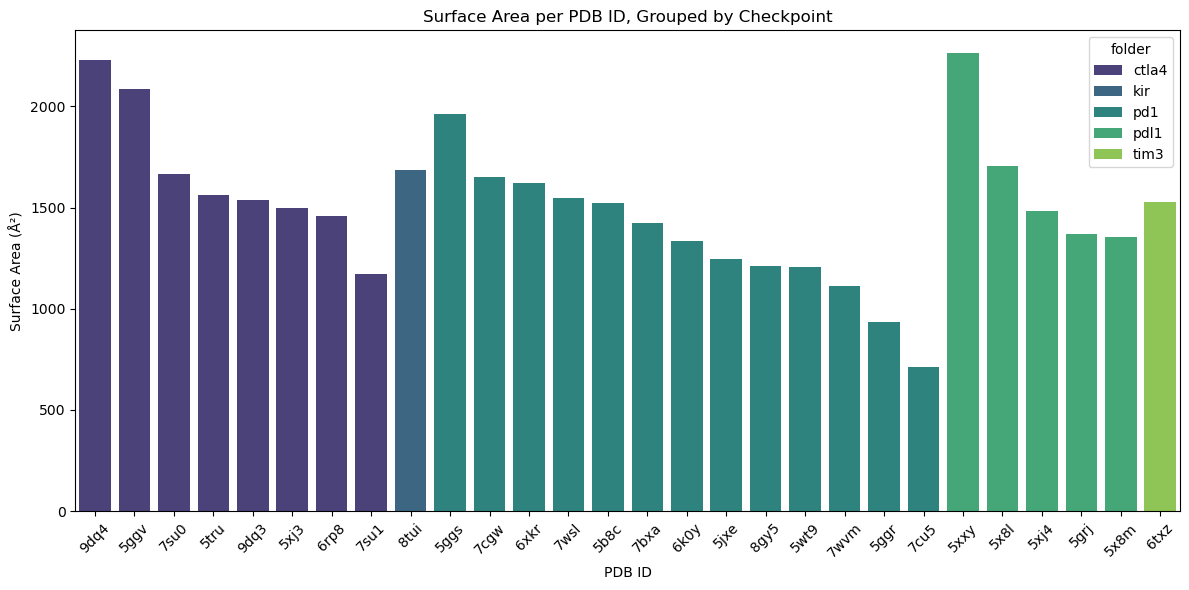

In [63]:
# Convert to DataFrame
df = pd.DataFrame(results)

# Sort by surface area (optional)
df = df.sort_values("epitope_area", ascending=False)

df_sorted = df.sort_values(by=["folder", "epitope_area"], ascending=[True, False])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="pdb_id", y="epitope_area", hue="folder", palette="viridis")


plt.title("Surface Area per PDB ID, Grouped by Checkpoint")
plt.xlabel("PDB ID")
plt.ylabel("Surface Area (Å²)")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show() 
plt.savefig('plots/barplot_surface_area.pdf', bbox_inches = 'tight')
plt.show()




# plt.figure(figsize=(12, 6))
# sns.barplot(data=df, x="pdb_id", y="epitope_area", hue="folder")

# plt.title("Surface Area per PDB ID and Checkpoint")
# plt.xlabel("PDB ID")
# plt.ylabel("Surface Area (Å²)")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


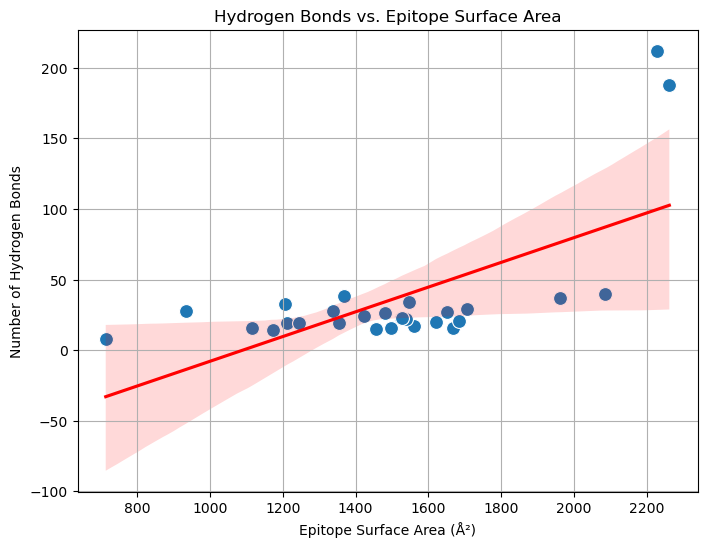

In [83]:
df = pd.read_csv("epitope_surface_hbonds_summary.csv")

# Scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="epitope_area", y="num_hydrogen_bonds", s=100)
sns.regplot(data=df, x="epitope_area", y="num_hydrogen_bonds", scatter=False, color="red")
plt.xlabel("Epitope Surface Area (Å²)")
plt.ylabel("Number of Hydrogen Bonds")
plt.title("Hydrogen Bonds vs. Epitope Surface Area")
plt.grid(True)
plt.show()